In [1]:
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

sns.set()

## Import preprocessed data

In [2]:
df = pd.read_csv(join('..', 'data', 'tugas_preprocessed.csv'))

In [3]:
df.head()

,income,frq,rcn,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase,spent_online,...,x1_Widow,x2_M,x3_1.0,x4_Kind of OK,x4_Meh...,x4_OK nice!,x4_Take my money!!,PC0,PC1,PC2
0,0.743162,1.191605,0.457819,-0.617023,-0.243065,1.216847,0.495837,-0.499274,-1.257560,0.522055,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.896356,1.937697,-1.120781
1,1.559488,1.100011,-1.535723,0.166160,-0.790228,0.740464,-0.374374,-0.631907,-1.798649,-0.237578,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.981092,1.421498,-0.785625
2,-1.548542,-0.823463,0.557496,-0.834573,1.672006,-0.371096,-0.809480,2.286023,0.906799,-0.904191,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,-2.813108,-0.381440,0.780867
3,0.845528,0.550447,-1.402820,0.383710,0.440889,-0.768082,-0.084304,-0.234007,-0.391816,0.785568,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.247013,0.514177,1.302203
4,0.782435,1.008417,-0.871209,0.340200,-0.243065,-0.053508,-0.374374,-0.366640,-0.445925,1.237135,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.781920,0.704805,0.443376


In [6]:
df.columns

Index(['income', 'frq', 'rcn', 'clothes', 'kitchen', 'small_appliances',
       'toys', 'house_keeping', 'per_net_purchase', 'spent_online',
       'x0_2nd Cycle', 'x0_Graduation', 'x0_Master', 'x0_PhD', 'x1_Married',
       'x1_Single', 'x1_Together', 'x1_Widow', 'x2_M', 'x3_1.0',
       'x4_Kind of OK', 'x4_Meh...', 'x4_OK nice!', 'x4_Take my money!!',
       'PC0', 'PC1', 'PC2'],
      dtype='object')

In [7]:
# Splitting feature names into groups
non_metric_features = df.columns[df.columns.str.startswith('x')]
pc_features = df.columns[df.columns.str.startswith('PC')]
metric_features = df.columns[~df.columns.str.startswith('x') & ~df.columns.str.startswith('PC')]

## K-Means Clustering
What is K-Means clustering? How does it work?

### How is it computed?
![](../figures/kmeans.png)

### Characteristics:
- *Number of clusters* need to be set apriori
- One of the *fastest* clustering algorithms
- The results *depend on the initialization* (stochastic)
- Prone to *local optima*
- Favors *convex* (round shape) and *isotropic* (same shape) clusters

### How to apply K-Means clustering?

In [46]:
kmclust = KMeans(n_clusters=5, init='random', n_init=1, random_state=None)

#    n_clusters=8,
#    *,
#    init='k-means++',
#    n_init=10, --> Number of time the k-means algorithm will run with different centroid seeds. Final results will be the best output of
#                   n_init consecutive runs in terms of inertia.
#    max_iter=300,
#    tol=0.0001,
#    precompute_distances='deprecated',
#    verbose=0,
#    random_state=None,  --> allows me to duplicate my randomness
#    copy_x=True,
#    n_jobs='deprecated',
#    algorithm='auto',

    
# the fit method
kmclust.fit(df[metric_features])

KMeans(init='random', n_clusters=5, n_init=1)

In [47]:
# the predict method
kmclust.predict(df[metric_features])

array([4, 4, 3, ..., 0, 4, 1])

In [17]:
# the transform method
pd.DataFrame(kmclust.transform(df[metric_features]))

,0,1,2,3,4
0,3.440152,2.142492,3.713802,4.619784,1.179115
1,3.594273,3.216236,4.128408,5.827962,1.971672
2,5.389372,4.267994,3.849959,2.517953,5.606734
3,2.070513,2.390715,3.181811,4.609418,2.634757
4,1.650890,2.552043,3.209737,4.952932,1.872265
...,...,...,...,...,...
8812,2.325444,2.893420,3.255035,4.682814,2.967610
8813,2.006145,3.754905,3.751533,5.512471,3.515578
8814,3.693235,3.752069,2.024462,3.298851,4.505364
8815,3.120790,2.408920,3.074119,3.738282,2.517072


### How can we improve the initialization step?

In [48]:
# Better initialization method and provide more n_init

# init='k-means++' & n_init=15
kmclust = KMeans(n_clusters=5, init='k-means++', n_init=15, random_state=1)
kmclust.fit(df[metric_features])

KMeans(n_clusters=5, n_init=15, random_state=1)

In [49]:
kmclust.predict(df[metric_features])
# Returns the same result everytime

array([4, 4, 0, ..., 2, 4, 1])

*init='k-means++'* initializes the centroids to be (generally) distant from each other, leading to probably better results than random initialization. *n_init=K* allows to initialize KMeans K times and pick the best clustering in terms of Inertia. This can been shown in the link below.

**Empirical evaluation of the impact of k-means initialization:**

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_stability_low_dim_dense.html#sphx-glr-auto-examples-cluster-plot-kmeans-stability-low-dim-dense-py

### Defining the number of clusters:

In [75]:
range_clusters = range(2, 11) # Goes from 2 to 10

In [76]:
inertia = []

for n_clus in range_clusters:  # iterate over desired ncluster range
    
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(df[metric_features])
    
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

print(inertia)

[67166.77874914452, 52973.55241023803, 46736.65485715153, 42189.58282488099, 39883.766299443174, 37885.24251203413, 36277.77069520268, 34921.02592728754, 33556.1286728264]


**Inertia (within-cluster sum-of-squares distance) Formula:**
$$\sum_{j=0}^{C}\sum_{i=0}^{n_j}(||x_i - \mu_j||^2)$$
, where:

$C$: Set of identified clusters.

$n_j$: Set of observations belonging to cluster $j$.

$x_i$: Observation $i$.

$\mu_j$: Centroid of cluster $j$.

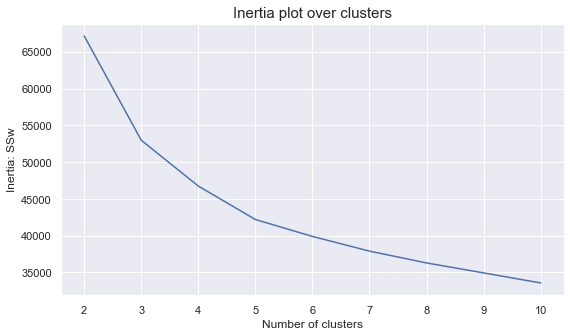

In [77]:
# The inertia plot
plt.figure(figsize=(9,5))

plt.plot(pd.Series(inertia, index = range_clusters))

plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

In [78]:
# I would say the elbow is on number of cluster = 4, so we can try with 3, 4 or 5 and evaluate the results

**Silhouette Coefficient formula for a single sample:**
$$s = \frac{b - a}{max(a, b)}$$
, where:
- $a$: The mean distance between a sample and all other points in the same cluster.
- $b$: The mean distance between a sample and all other points in the next nearest cluster

For n_clusters = 2, the average silhouette_score is : 0.2216925624241448
For n_clusters = 3, the average silhouette_score is : 0.23707766584584286
For n_clusters = 4, the average silhouette_score is : 0.21036821905415626
For n_clusters = 5, the average silhouette_score is : 0.19514283937028068
For n_clusters = 6, the average silhouette_score is : 0.18736793579734382
For n_clusters = 7, the average silhouette_score is : 0.16983500681630878
For n_clusters = 8, the average silhouette_score is : 0.16670886503251847
For n_clusters = 9, the average silhouette_score is : 0.1549596056099329
For n_clusters = 10, the average silhouette_score is : 0.15066928575504182


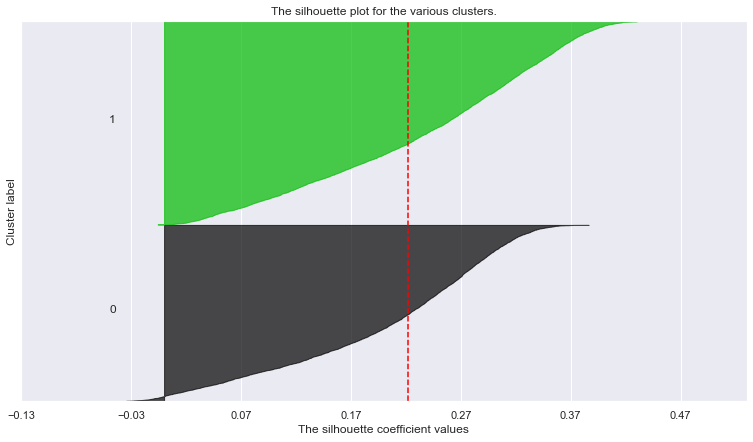

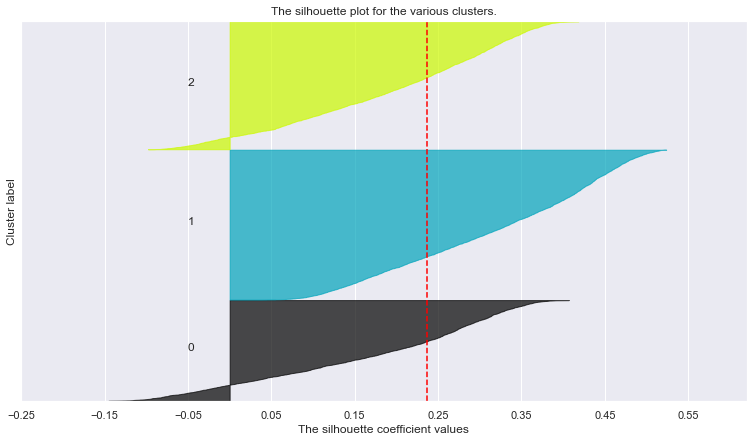

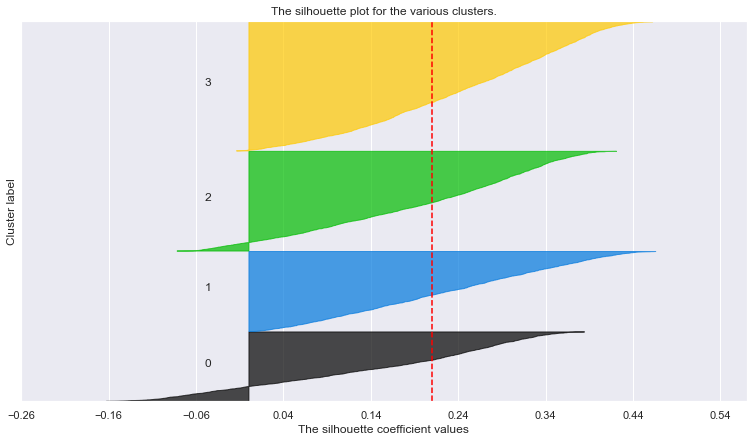

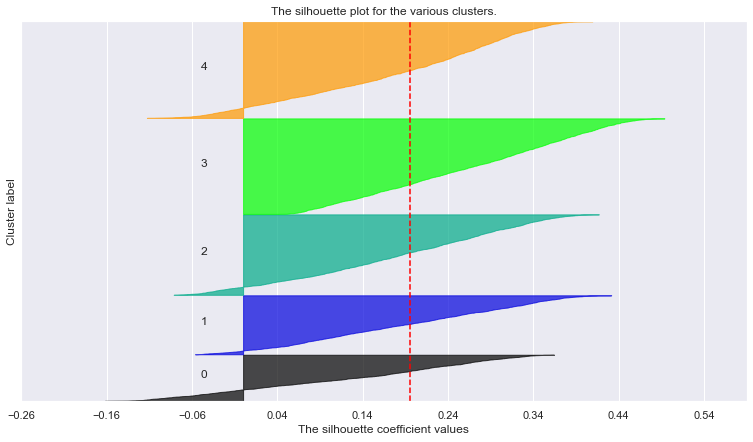

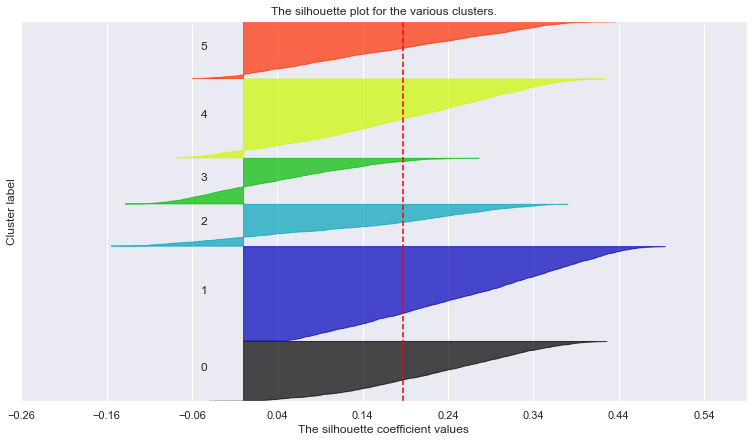

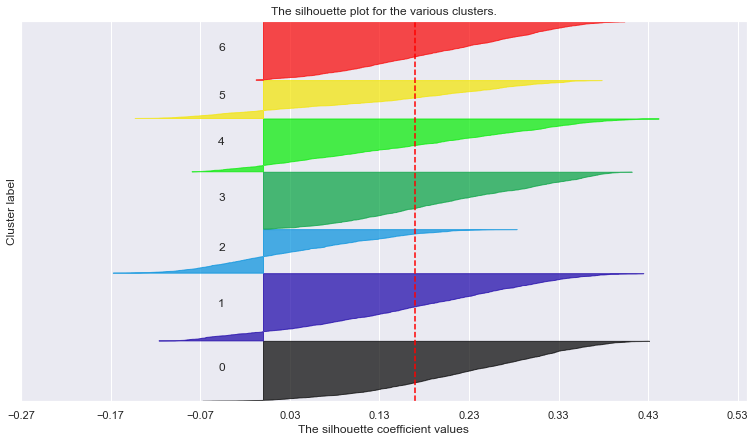

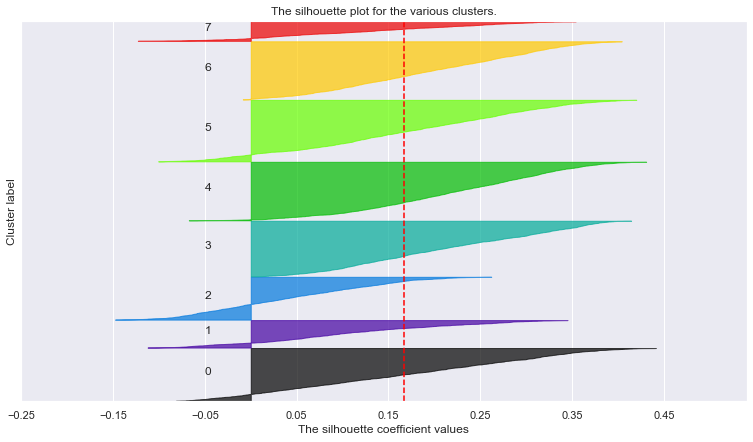

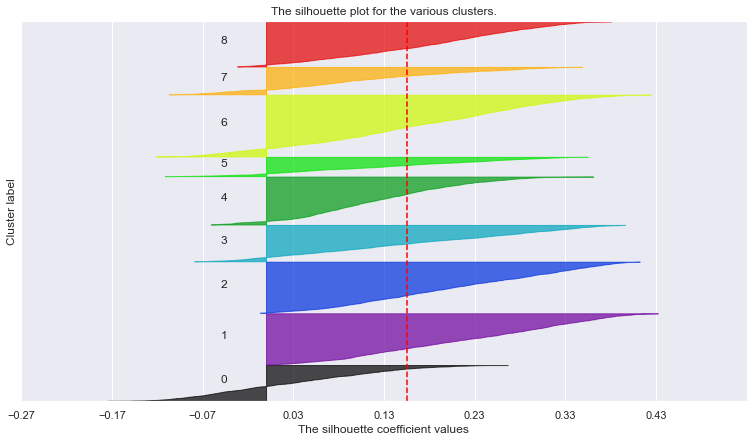

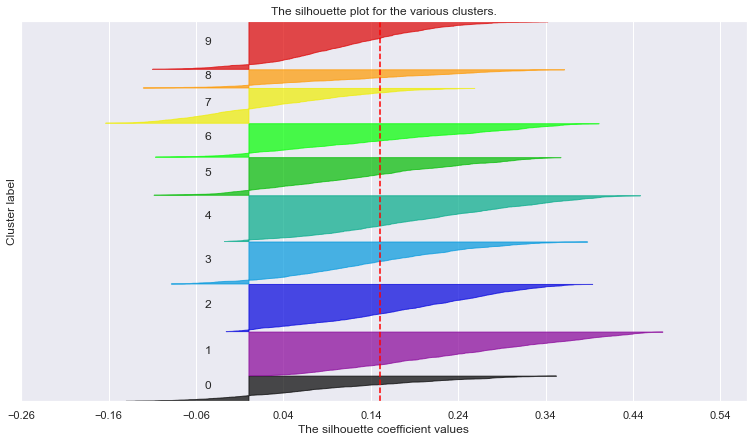

In [79]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []

for nclus in range_clusters:
    
    # Skip nclus == 1, start with 2 clusters
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    # Use the fit_predict argument
    cluster_labels = kmclust.fit_predict(df[metric_features])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df[metric_features], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # -------------------------------------------------------------------------------------
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df[metric_features], cluster_labels)

    y_lower = 10
    
    for i in range(nclus):
        
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

        
    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df[metric_features]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [80]:
# Analyse the graphics:
#    As n_clusters increase there are more negative silhouette values (oservations that are closer to other clusters)
#    More condensed clusters
#    See the maximum silhouette_score --> n_clusters = 3, 4 or 5


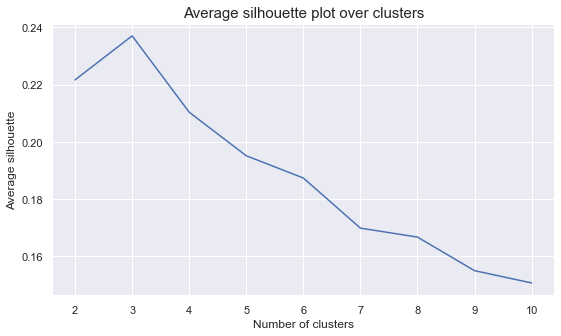

In [81]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))

plt.plot(pd.Series(avg_silhouette, index = range_clusters))

plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

### Final KMeans clustering solution

In [82]:
# final cluster solution
number_clusters = 3
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(df[metric_features])
km_labels

array([2, 2, 0, ..., 1, 2, 2])

In [59]:
# Characterizing the final clusters
df_concat = pd.concat((df, pd.Series(km_labels, name='labels')), axis=1)
df_concat.groupby('labels').mean()

,income,frq,rcn,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase,spent_online,...,x1_Widow,x2_M,x3_1.0,x4_Kind of OK,x4_Meh...,x4_OK nice!,x4_Take my money!!,PC0,PC1,PC2
labels,,,,,,,,,,,,,,,,,,,,,
0,-1.046753,-0.846839,0.106507,-1.036292,0.812795,0.472976,0.817424,0.835083,0.697810,-0.769234,...,0.008948,0.652748,0.842778,0.328504,0.334470,0.325096,0.001278,-2.480245,0.110876,0.043692
1,-0.194692,-0.335311,-0.009968,0.891570,-0.578927,-0.635109,-0.585195,-0.563728,0.409679,-0.068841,...,0.024355,0.640115,0.936676,0.298567,0.285100,0.349857,0.062178,0.660500,-1.437224,0.071740
2,1.052418,1.059654,-0.072209,-0.227987,0.037861,0.371294,0.041556,0.002507,-1.029376,0.686459,...,0.110403,0.640268,0.360738,0.080537,0.087584,0.463423,0.368456,1.179863,1.595868,-0.118429


### How can we combine the 2 algorithms?

## Exercise:
**Apply Hierarchical Clustering and K-means on the Principal Components.**

Choose the appropriate parameters and number of clusters for each algorithm and interpret each cluster based on the Principal Components interpretation: